### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

### Import Data & Preprocessing

In [45]:
url = 'https://drive.google.com/file/d/10WGB6yHEpyGJNKT_-JfR0_n2iurUnU2L/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
account = pd.read_csv(url, sep = ';')

In [46]:
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


#### Converting String Features to Catagorical Values

In [47]:
from sklearn.preprocessing import OneHotEncoder
frequency_encoder = OneHotEncoder()
account_encoder = frequency_encoder.fit_transform(account.frequency.values.reshape(-1,1)).toarray()

accountOneHot = pd.DataFrame(account_encoder, columns = ["frequency_"+str(int(i)) for i in range(account_encoder.shape[1])])
account = pd.concat([account, accountOneHot], axis=1)
account = account.drop('frequency', axis = 1)

In [48]:
account.head()

,account_id,district_id,date,frequency_0,frequency_1,frequency_2
0,576,55,930101,1.0,0.0,0.0
1,3818,74,930101,1.0,0.0,0.0
2,704,55,930101,1.0,0.0,0.0
3,2378,16,930101,1.0,0.0,0.0
4,2632,24,930102,1.0,0.0,0.0


In [50]:
url = 'https://drive.google.com/file/d/1YJtFjOVIl1wV-UltDiZlvlWNJD9H7cVC/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
order = pd.read_csv(url, sep = ';')

In [51]:
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


#### Converting String Features to Catagorical Values

In [54]:
from sklearn.preprocessing import OneHotEncoder
bank_to_encoder = OneHotEncoder()
order_encoder = bank_to_encoder.fit_transform(order.bank_to.values.reshape(-1,1)).toarray()

orderOneHot1 = pd.DataFrame(order_encoder, columns = ["bank_to_"+str(int(i)) for i in range(order_encoder.shape[1])])
order = pd.concat([order, orderOneHot1, ], axis=1)
order = order.drop('bank_to', axis = 1)

In [55]:
order.head()

,order_id,account_id,account_to,amount,k_symbol,bank_to_0,bank_to_1,bank_to_2,bank_to_3,bank_to_4,bank_to_5,bank_to_6,bank_to_7,bank_to_8,bank_to_9,bank_to_10,bank_to_11,bank_to_12
0,29401,1,87144583,2452.0,SIPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,29402,2,89597016,3372.7,UVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,29403,2,13943797,7266.0,SIPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,29404,3,83084338,1135.0,SIPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,29405,3,24485939,327.0,,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
url = 'https://drive.google.com/file/d/1WTmM5qxJJLcDuHRKhW2v9jxb9UAcTj4Z/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
transaction = pd.read_csv(url, sep = ';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [115]:
transaction.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


#### Converting String Features to Catagorical Values

In [116]:
from sklearn.preprocessing import OneHotEncoder
type_encoder = OneHotEncoder()
operation_encoder = OneHotEncoder()
bank_encoder = OneHotEncoder()
transaction_encoder1 = type_encoder.fit_transform(transaction.type.values.reshape(-1,1)).toarray()
transaction_encoder2 = operation_encoder.fit_transform(transaction.operation.values.reshape(-1,1)).toarray()
transaction_encoder3 = bank_encoder.fit_transform(transaction.bank.values.reshape(-1,1)).toarray()

transactionOneHot1 = pd.DataFrame(transaction_encoder1, columns = ["type_"+str(int(i)) for i in range(transaction_encoder1.shape[1])])
transactionOneHot2 = pd.DataFrame(transaction_encoder2, columns = ["operation_"+str(int(i)) for i in range(transaction_encoder2.shape[1])])
transactionOneHot3 = pd.DataFrame(transaction_encoder3, columns = ["bank_"+str(int(i)) for i in range(transaction_encoder3.shape[1])])

transaction = pd.concat([transaction, transactionOneHot1, transactionOneHot2, transactionOneHot3], axis=1)
transaction = transaction.drop('type', axis = 1)
transaction = transaction.drop('operation', axis = 1)
transaction = transaction.drop('bank', axis = 1)

In [117]:
transaction.shape

(1056320, 30)

### Dealing with Nan Data & Feature Selection

**Note:** After running a lot of experiments and observing behavior of PCA model we understood that their are a lot of Nan values for different columns which all can't be dealt in a similar way and we looked for total nan values and seeing if they could be dropped altogether.

In [175]:
X = pd.concat([account, order, transaction], axis=0)

# dividing the data into train and test sets for the k-means model
X_new = X.copy() #create a copy of your data 
X_new.dropna(axis = 0, how='all', inplace=True)
X_new.fillna(0, inplace=True)

x_train = X_new.sample(frac=0.40, random_state=0)
x_test = X_new.drop(x_train.index)

In [249]:
X_new.head()

,account_id,district_id,date,frequency_0,frequency_1,frequency_2,order_id,account_to,amount,k_symbol,...,bank_4,bank_5,bank_6,bank_7,bank_8,bank_9,bank_10,bank_11,bank_12,bank_13
0,576,55.0,930101.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3818,74.0,930101.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,704,55.0,930101.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2378,16.0,930101.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2632,24.0,930102.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
X_new.shape

(244886, 49)

In [166]:
X_new['order_id'].isna().sum()

238415

In [167]:
X_new['account_id'].isna().sum()

0

In [168]:
X_new['trans_id'].isna().sum()

10971

In [169]:
X_new['balance'].isna().sum()

10971

> After figuring out which columns to drop, we created a subset of values which need to be dropped out, we filtered the dataset.

In [176]:
df = x_train.drop(['k_symbol', 'order_id', 'trans_id'], axis = 1)

In [173]:
df.columns

Index(['account_id', 'district_id', 'date', 'frequency_0', 'frequency_1',
       'frequency_2', 'account_to', 'amount', 'bank_to_0', 'bank_to_1',
       'bank_to_2', 'bank_to_3', 'bank_to_4', 'bank_to_5', 'bank_to_6',
       'bank_to_7', 'bank_to_8', 'bank_to_9', 'bank_to_10', 'bank_to_11',
       'bank_to_12', 'balance', 'account', 'type_0', 'type_1', 'type_2',
       'operation_0', 'operation_1', 'operation_2', 'operation_3',
       'operation_4', 'operation_5', 'bank_0', 'bank_1', 'bank_2', 'bank_3',
       'bank_4', 'bank_5', 'bank_6', 'bank_7', 'bank_8', 'bank_9', 'bank_10',
       'bank_11', 'bank_12', 'bank_13'],
      dtype='object')

#### PCA for Feature Selection

In [216]:
from sklearn.decomposition import PCA

pca = PCA(3) 
df_pca = pca.fit_transform(df)

In [217]:
pca.explained_variance_ratio_

array([9.19166085e-01, 8.08273246e-02, 6.21516626e-06])

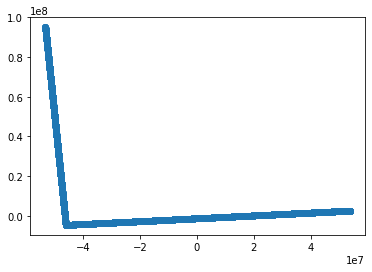

In [218]:
plt.scatter(df_pca[:, 0], df_pca[:, 1])

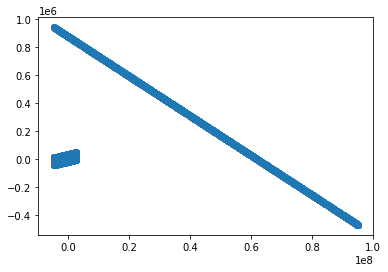

In [187]:
plt.scatter(df_pca[:, 1], df_pca[:, 2])

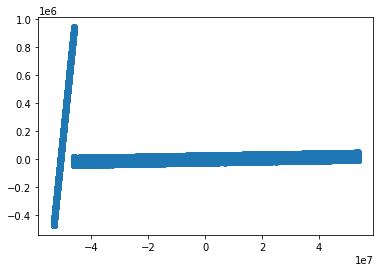

In [188]:
plt.scatter(df_pca[:, 0], df_pca[:, 2])

In [189]:
print(type(df), df.shape)

<class 'pandas.core.frame.DataFrame'> (97954, 46)


In [209]:
kmeans = KMeans(n_clusters=2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)

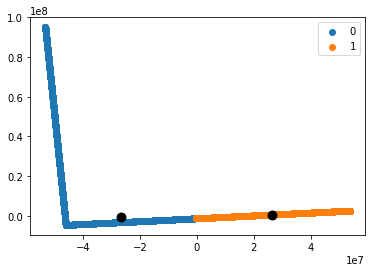

In [219]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

#plotting the results:
for i in u_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

### Finding "outliers" based on the distance from centers

In [220]:
# points array will be used to reach the index easy
points = np.empty((0,len(df_pca[0])), float)
# distances will be used to calculate outliers
distances = np.empty((0,len(df_pca[0])), float)

In [221]:
from scipy.spatial.distance import cdist
# getting points and distances
for i, center_elem in enumerate(centroids):
    # cdist is used to calculate the distance between center and other points
    distances = np.append(distances, cdist([center_elem],df_pca[label == i], 'euclidean')) 
    points = np.append(points, df_pca[label == i], axis=0)

In [241]:
percentile = 95
# getting outliers whose distances are greater than some percentile
outliers = points[np.where(distances > np.percentile(distances, percentile))]

In [237]:
df.shape

(97954, 46)

In [242]:
outliers.shape

(4898, 3)

In [251]:
def predict_outlier(test):
  return True

### Testing with a value

In [252]:
test_value = []
predict_outlier(test_value)

True

#### Isolation Method

In [ ]:
!pip install pycaret==2.3.5
!pip install scipy==1.4.1

In [ ]:
!pip uninstall numpy
!pip install numpy

In [ ]:
!pip install --upgrade numpy

In [ ]:
from pycaret.anomaly import setup, create_model, assign_model, plot_model

In [ ]:
!numpy -v

In [ ]:
anom = setup(data = df, silent = True)

,Description,Value
0,session_id,5263
1,Original Data,"(426916, 11)"
2,Missing Values,False
3,Numeric Features,11
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(426916, 11)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [ ]:
anom_model = create_model(model = 'iforest', fraction = 0.05)
results = assign_model(anom_model)

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=5263, verbose=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=5263, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(426916, 13)
INFO:logs:assign_model() succesfully completed......................................


In [ ]:
plot_model(anom_model, plot = 'tsne')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(fold=None, use_train_data=False, verbose=True, is_in_evaluate=False, display=None, display_format=None, estimator=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=5263, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot=tsne, save=False, scale=1, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=5)

INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: tsne
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=5263, verbose=0), transformation=True, score=False, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:Transformation param set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:(426916, 12)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Getting dummies to cast categorical variables
INFO:logs:Fitting TSNE()


In [ ]:
plot_model(anom_model, plot = 'umap')